## Fall 2019: MATH 347 Bayesian Statistics

  *__Bayesian inference__ provides a formal approach for updating __prior belief__ with the __observed data__ to quantify uncertainity __a posteriori__ about $\theta$*

This is the jupyter notebook for the bayesian posterior distribution with binominal data and a discrete prior.  
**Question:** What percentage $p$ of all Vassar students stayed up at least one night last year?

### Step 0: Prepare Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

### Step 1: load the prior and data

In [2]:
# prior distribution (beleif)
prior_values = np.array([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
prior_probs = np.array([1/23, 1/23, 7/23, 7/23, 3/23, 3/23, 1/23, 0/23, 0/23, 0/23, 0/23])

# Assume that the sample is representative of Vassar students at large.
# Observed sample data: 10 people and 3 of them stayed up at lears one night last year (0.3)
n = 10
y = 3

### Step 2: Calculate the likelihood probablities and posterior probablities
We choosed binominal distribution as sampling models - $f(y|\theta)$  
In discrete case, Bayes' Theorem says: $$\pi(\theta|y)=\frac{f(y|\theta)\pi(\theta)}{\sum{f(y|\theta_i)pi(\theta_i)}}$$

In [3]:
# probability of sampling model outputs y given prior-value
binom_probs = binom.pmf(y, n, prior_values)

# compute joint probabilities
joint_probs = binom_probs * prior_probs

# compute marginal probability of y
prob_fy = np.sum(joint_probs)

# compute posterior probabilities
posterior_probs = joint_probs / prob_fy

### Step 3: Show results

In [4]:
result = np.transpose(np.array([prior_values, prior_probs, posterior_probs]))
df = pd.DataFrame(result, columns = ['p','prior','posterior'])
print(df)

      p     prior  posterior
0   0.0  0.043478   0.000000
1   0.1  0.043478   0.013124
2   0.2  0.304348   0.322235
3   0.3  0.304348   0.427073
4   0.4  0.130435   0.147474
5   0.5  0.130435   0.080385
6   0.6  0.043478   0.009710
7   0.7  0.000000   0.000000
8   0.8  0.000000   0.000000
9   0.9  0.000000   0.000000
10  1.0  0.000000   0.000000


Visualization:

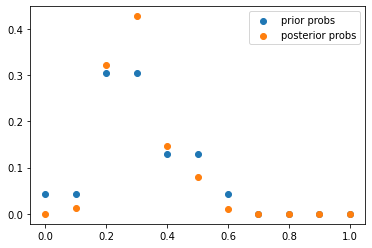

In [5]:
plt.scatter(prior_values, prior_probs, label="prior probs")
plt.scatter(prior_values, posterior_probs, label='posterior probs')
plt.legend()
plt.show()

### HW1-Problem 6: Sequential Update

In [6]:
# Suppose that another samples have been added
n2 = 10
y2 = 5

In [12]:
# With replacing prior_probs with posterior probs
prior_probs_updated = posterior_probs
binom_probs_updated = binom.pmf(y2, n2, prior_values)
joint_probs_updated = binom_probs_updated * prior_probs_updated
prob_fy_updated = np.sum(joint_probs_updated)
posterior_probs_updated = joint_probs_updated / prob_fy_updated
    
# Without update
n = n + n2
y = y + y2
binom_probs = binom.pmf(y, n, prior_values)
joint_probs = binom_probs * prior_probs
prob_fy = np.sum(joint_probs)
posterior_probs = joint_probs / prob_fy


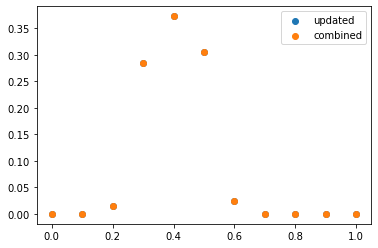

In [13]:
plt.scatter(prior_values, posterior_probs_updated, label="updated")
plt.scatter(prior_values, posterior_probs, label="combined")
plt.legend()
plt.show()

https://stats.stackexchange.com/questions/169144/bayesian-updating-point-for-point/169186#169186

If observations(data) are exchangable, That is, $$p(X_1,...,X_n|\theta)=\prod_{i=1}^{n}{p(X_i|\theta)}$$ We can get the same result regardless of choosing point-by-point or via a batch update of observations